# Data Analysis on Heart Disease

## Introduction
One of the leading causes of death in the world and the leading cause in the United States, is heart disease and has been for many years. With the rate of them increasing worldwide in recent years, it is important to look at the leading causes of this disease and establish a relationship between them and its global increase. As a base for our analysis we are going to use the heart disease dataset available at Kaggle.

The dataset originates from 1988 and evaluates data from four different databases: Cleveland, Hungary, Switzerland and Long Beach V. While the dataset does have 76 distinct attributes, it only utilizes 14 of them. 

**Predictive question:**
How does the amount of age, cholesterol, maximum heart rate, Resting Blood Pressure help us predict the diagnosis of heart disease?

In [31]:
### Run this cell before continuing.
install.packages("kknn")
library(kknn)
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
options(repr.matrix.max.rows = 10)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Reading the Data

First read the raw data from GitHub that we uploaded.

In [32]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/yma24ma/dsci_009_43_gp/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1    52  1   0  125      212  0   1       168     0     1.0     2     2  3   
2    53  1   0  140      203  1   0       155     1     3.1     0     0  3   
3    70  1   0  145      174  0   1       125     1     2.6     0     0  3   
4    61  1   0  148      203  0   1       161     0     0.0     2     1  3   
5    62  0   0  138      294  1   1       106     0     1.9     1     3  2   
⋮    ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
1021 59  1   1  140      221  0   1       164     1     0.0     2     0  2   
1022 60  1   0  125      258  0   0       141     1     2.8     1     1  3   
1023 47  1   0  110      275  0   0       118     1     1.0     1     1  2   
1024 50  0   0  110      254  0   0       159     0     0.0     2     0  2   
1025 54  1   0  120      188  0   1       113     0     1.4     1     1  3   
     target
1    0     
2    0     
3    0     
4    0     
5    0     
⋮    ⋮     
1021 1     
1022 0     
1023 0     
1024 1     
1025 0

**Variables**

age: Age

sex: Sex

cp: Chest pain type (4 values)

trestbps: resting blood pressure

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results (values 0,1,2)

thalacg: maximum heart rate achieved

exang: exercise induced angina

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: diagnosis of heart disease

**Select Data**

We will now be using the `select()` function to select the row that we will be using in this analysis and make it into one table.

In [33]:
heart_disease_selected <- select(heart_disease_data, age, chol, target,thalach, trestbps)|>
                        mutate(target=as_factor(target))|>
                        mutate(heart_disease=fct_recode(target, "Yes" = "1", "No " = "0"))
heart_disease_selected

age chol target thalach trestbps heart_disease
1    52  212  0      168     125      No           
2    53  203  0      155     140      No           
3    70  174  0      125     145      No           
4    61  203  0      161     148      No           
5    62  294  0      106     138      No           
⋮    ⋮   ⋮    ⋮      ⋮       ⋮        ⋮            
1021 59  221  1      164     140      Yes          
1022 60  258  0      141     125      No           
1023 47  275  0      118     110      No           
1024 50  254  1      159     110      Yes          
1025 54  188  0      113     120      No

We use the sum function to check if there are any NA values in our data tables

In [34]:
sum(is.na(heart_disease_selected))

[1] 0

**Average of Selected**

In [35]:
hd_average1 <- heart_disease_selected |>
                map(mean) 
hd_average1

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


$age
[1] 54.43415

$chol
[1] 246

$target
[1] NA

$thalach
[1] 149.1141

$trestbps
[1] 131.6117

$heart_disease
[1] NA

**Plot Sex X Target**

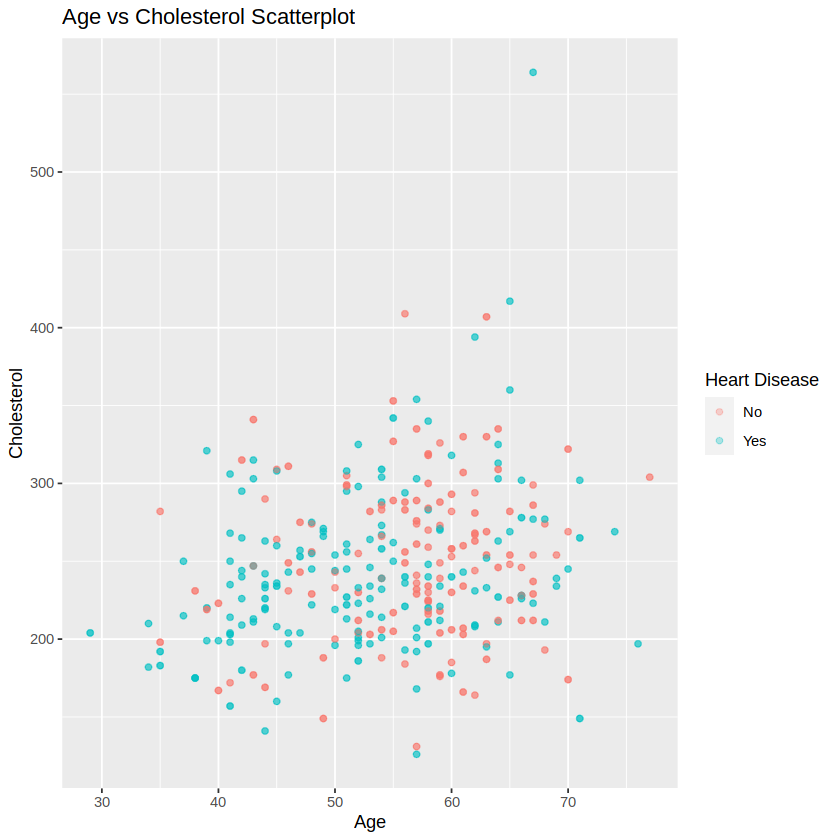

In [37]:
hd_age_chol_plot<-ggplot(hd_age_chol,aes(x=age,y=chol,colour=heart_disease))+
                        geom_point(alpha=0.3)+
                        labs(x="Age",y="Cholesterol",colour="Heart Disease")+       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_age_chol_plot   

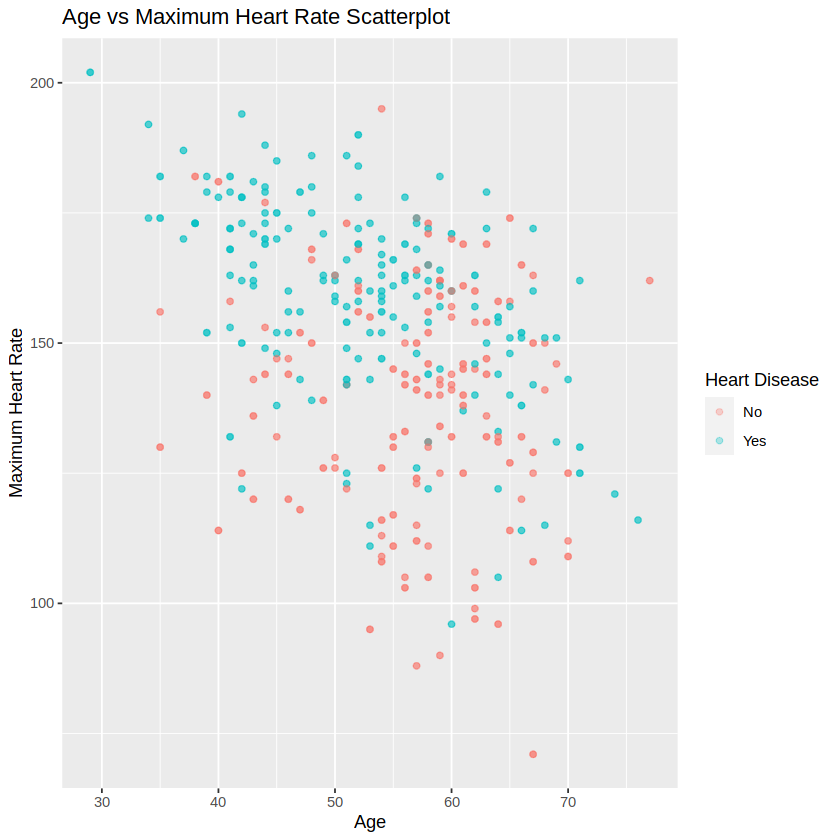

In [39]:
hd_age_thalach_plot<-ggplot(hd_age_thalach,aes(x=age,y=thalach,colour=heart_disease))+
                        geom_point(alpha=0.3)+
                        labs(x="Age",y="Maximum Heart Rate",colour="Heart Disease")+       
                    ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_age_thalach_plot   

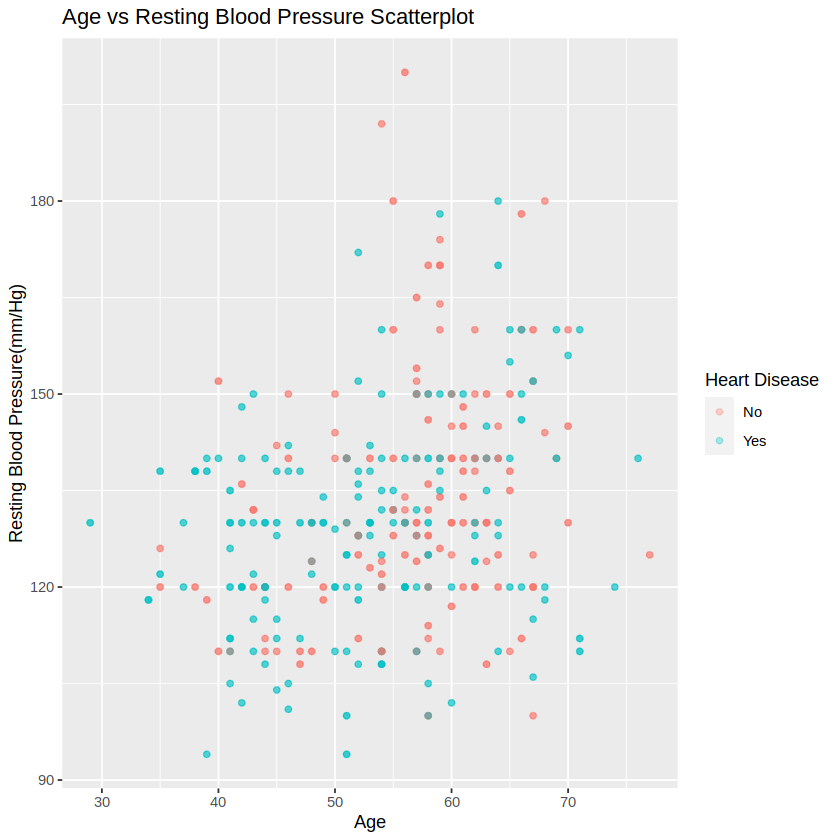

In [41]:
hd_age_trestbps_plot<-ggplot(hd_age_trestbps,aes(x=age,y=trestbps,colour=heart_disease))+
                        geom_point(alpha=0.3)+
                        labs(x="Age",y="Resting Blood Pressure(mm/Hg)",colour="Heart Disease")+       
                    ggtitle("Age vs Resting Blood Pressure Scatterplot")
hd_age_trestbps_plot   

## Methods
For our Heart Disease data set, we are going to use the method of K-nearest neighbors classification. Essentially, we are going to use predictor variables chol (amount of cholesterol), thal (type of heart defect), age and sex to predict the diagnosis class of heart disease, which can be categorized into 0 (no heart disease) or 1 (heart disease). Therefore, the column names we will incorporate are chol, thal, age, sex and target. We chose to only use four predictor variables because we think that there are more than two factors that contribute to the diagnosis of heart disease. Since there are multivariables, we can avoid a 4D graph by using the facet_grid function to create a plot that has multiple subplots arranged in a grid.

## Expected outcomes and significance


What do you expect to find?

We expect to identify the most relevant features that contribute to the presence or absence of heart disease.We also look for patterns and correlations within the data.

What impact could such findings have?

Understanding the factors that contribute to heart disease can inform public health initiatives.Furthermore, discoveries from this dataset can enhance healthcare by improving diagnostic tools and predictive models for heart disease, potentially leading to early detection and treatment.

What future questions could this lead to?

Are there additional attributes that should be considered, or are there redundant variables that can be eliminated to improve model performance?



In [42]:
set.seed(9999) 
heart_disease_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps,data = heart_disease_selected) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())
                        
heart_disease_scaled <- heart_disease_recipe |>  
                           prep() |> 
                           bake(heart_disease_selected)
heart_disease_scaled

age         chol       thalach    trestbps   heart_disease
1    -0.2683056  -0.6590104  0.8209198 -0.3774513 No           
2    -0.1580799  -0.8334543  0.2558430  0.4788735 No           
3     1.7157579  -1.3955514 -1.0481803  0.7643151 No           
4     0.7237261  -0.8334543  0.5166477  0.9355801 No           
5     0.8339519   0.9303676 -1.8740617  0.3646969 No           
⋮    ⋮           ⋮          ⋮          ⋮          ⋮            
1021  0.50327465 -0.4845665  0.6470500  0.4788735 Yes          
1022  0.61350040  0.2325919 -0.3527012 -0.3774513 No           
1023 -0.81943436  0.5620971 -1.3524524 -1.2337761 No           
1024 -0.48875711  0.1550613  0.4297128 -1.2337761 Yes          
1025 -0.04785411 -1.1241942 -1.5697896 -0.6628929 No

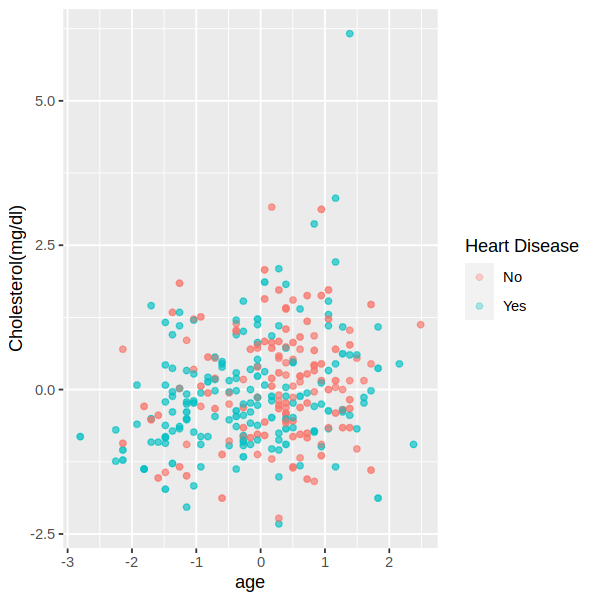

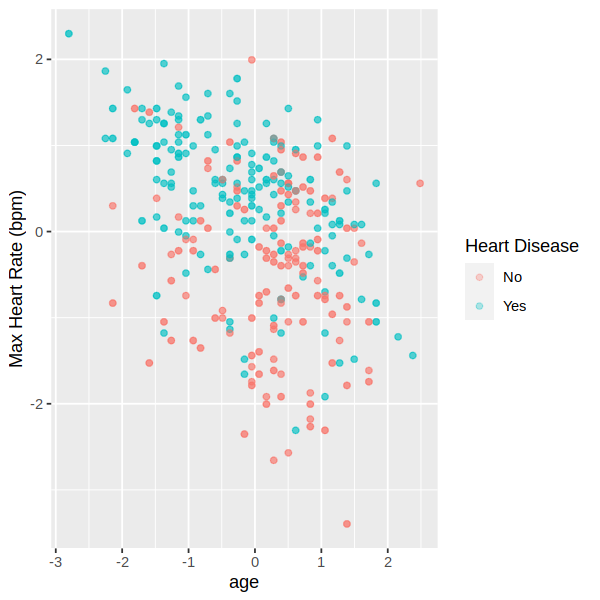

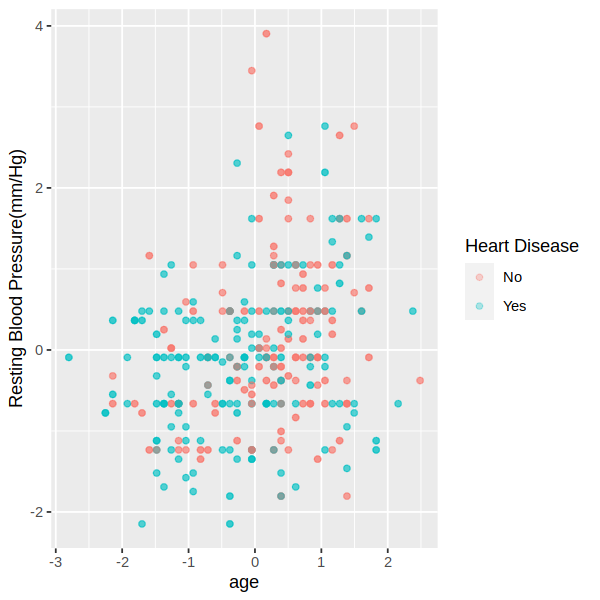

In [43]:
options(repr.plot.width = 5, repr.plot.height = 5)


heart_disease_chol_plot<-ggplot(heart_disease_scaled,aes(x=age,y=chol,color=heart_disease))+
geom_point(alpha=0.3)+
labs(x="age",
               y="Cholesterol(mg/dl)",
               colour="Heart Disease")


heart_disease_chol_plot

heart_disease_maxheart_plot<-ggplot(heart_disease_scaled,aes(x=age,y=thalach,color=heart_disease))+
geom_point(alpha=0.3)+
labs(x="age",
               y="Max Heart Rate (bpm)",
               colour="Heart Disease")


heart_disease_maxheart_plot

heart_disease_rbp_plot<-ggplot(heart_disease_scaled,aes(x=age,y=trestbps,color=heart_disease))+
geom_point(alpha=0.3)+
labs(x="age",
               y="Resting Blood Pressure(mm/Hg)",
               colour="Heart Disease")


heart_disease_rbp_plot

In [44]:
split_set<- initial_split(heart_disease_selected, prop = 0.75, strata =heart_disease)  
training_set<- training(split_set)   
testing_set <- testing(split_set)
testing_set
training_set

age chol target thalach trestbps heart_disease
1   58  248  1      122     100      Yes          
2   58  318  0      140     114      No           
3   71  149  1      125     112      Yes          
4   43  341  0      136     132      No           
5   51  308  1      142     140      Yes          
⋮   ⋮   ⋮    ⋮      ⋮       ⋮        ⋮            
253 42  295  1      162     120      Yes          
254 58  318  0      140     114      No           
255 65  282  0      174     138      No           
256 60  258  0      141     125      No           
257 50  254  1      159     110      Yes

age chol target thalach trestbps heart_disease
1   52  212  0      168     125      No           
2   53  203  0      155     140      No           
3   70  174  0      125     145      No           
4   61  203  0      161     148      No           
5   62  294  0      106     138      No           
⋮   ⋮   ⋮    ⋮      ⋮       ⋮        ⋮            
764 56  193  1      162     120      Yes          
765 45  308  1      170     128      Yes          
766 44  141  1      175     108      Yes          
767 47  204  1      143     112      Yes          
768 59  221  1      164     140      Yes

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


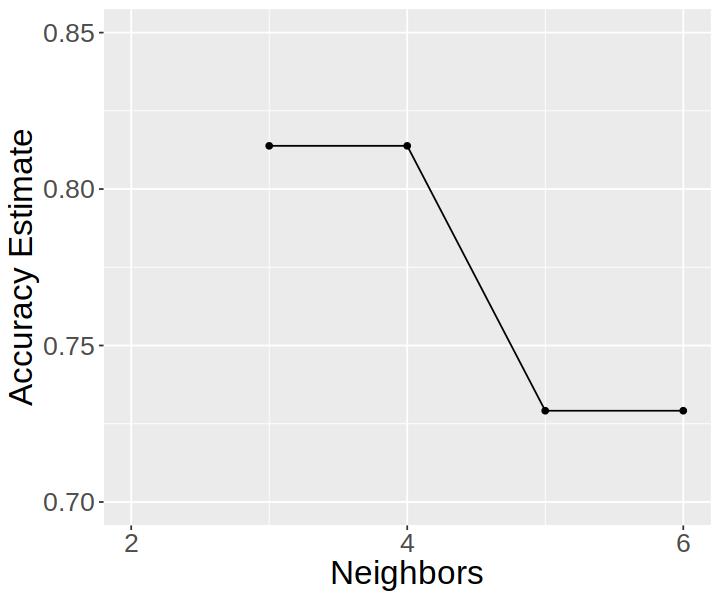

In [45]:
options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe  <- recipe(heart_disease ~ age + chol + thalach + trestbps , data = training_set) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())


mnist_vfold <- vfold_cv(training_set, v = 5, strata = heart_disease)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(2,3,4,5,6))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.7, 0.85))

cross_val_plot

In [46]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

mnist_fit <- workflow() |>
             add_recipe(mnist_recipe) |>
             add_model(mnist_spec) |>
            fit(data = training_set)
mnist_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1848958
Best kernel: rectangular
Best k: 4

In [47]:
new_ob<-tibble(age = 50,thalach = 170, chol=140, trestbps=200)
heart_disease_predicted<-predict(mnist_fit,new_ob)
heart_disease_predicted

.pred_class
1 Yes

lower k overfit higher k k underfit

visualize confusuion matrix 

In [52]:
test_predictions<- predict(mnist_fit ,testing_set) |>
      bind_cols(testing_set)

test_predictions

.pred_class age chol target thalach trestbps heart_disease
1   Yes         58  248  1      122     100      Yes          
2   No          58  318  0      140     114      No           
3   Yes         71  149  1      125     112      Yes          
4   No          43  341  0      136     132      No           
5   Yes         51  308  1      142     140      Yes          
⋮   ⋮           ⋮   ⋮    ⋮      ⋮       ⋮        ⋮            
253 Yes         42  295  1      162     120      Yes          
254 No          58  318  0      140     114      No           
255 No          65  282  0      174     138      No           
256 No          60  258  0      141     125      No           
257 No          50  254  1      159     110      Yes

In [53]:
prediction_accuracy<- test_predictions |>
        metrics(truth = heart_disease, estimate = .pred_class)             

prediction_accuracy

.metric  .estimator .estimate
1 accuracy binary     0.8754864
2 kap      binary     0.7512101

In [54]:
set.seed(9999) 

mnist_metrics <- mnist_predictions|>
  metrics(truth=heart_disease,estimate=.pred_class)|>
filter(.metric=="accuracy")

mnist_conf_mat <- mnist_predictions|>
  conf_mat(truth = heart_disease, estimate = .pred_class)


mnist_metrics
mnist_conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.8754864

          Truth
Prediction No  Yes
       No  113  20
       Yes  12 112